 <font size=6><b>DSC 522 Ghost Hunting: Finding a Botnet in Netflow Traffic<br>
    <font size=4>Cleaning the dataset, Qs.1 and Qs.3 a,b,f done by Mukila Rajasekar
 

## Cleaning the dataset

In [1]:
# Please note!!!  The group had to expand the RAM available to Jupyter for this code to run. 
# We exapnded the RAM to 4GB and recommend you do the same.  Please see the answer to the below
# stackoverflow page concerning expanding the amount of max_buffer_size. 
# https://stackoverflow.com/questions/57948003/how-to-increase-jupyter-notebook-memory-limit

In [2]:
#Importing packages
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading df
df = pd.read_csv(r'capture20110815-3.pcap.netflow_v2.txt', delim_whitespace=True)
df.head(2)

,Date,flow,start,Durat,Prot,Src,IP,Addr:Port,Dst,IP.1,Addr:Port.1,Flags,Tos,Packets,Bytes,Flows,Label,Labels
0,2011-08-15,17:13:40.449,4.230,TCP,90.177.154.197:20127,->,147.32.84.144:22,PA_,0,180,12628,1,Background,NaN,NaN,NaN,NaN,NaN
1,2011-08-15,17:13:40.449,4.204,TCP,147.32.84.144:22,->,90.177.154.197:20127,PA_,0,329,478578,1,Background,NaN,NaN,NaN,NaN,NaN


In [6]:
#The below was an extra, hidden column in the data set. 
df.Packets.unique()

array([nan, 'FILTER_LEGITIMATE'], dtype=object)

In [7]:
#Dropping unneccesary columns
df.drop(['Src','Bytes','Flows','Label','Labels','Flags'],axis=1,inplace = True)

In [8]:
df.head(2)

,Date,flow,start,Durat,Prot,IP,Addr:Port,Dst,IP.1,Addr:Port.1,Tos,Packets
0,2011-08-15,17:13:40.449,4.230,TCP,90.177.154.197:20127,147.32.84.144:22,PA_,0,180,12628,Background,NaN
1,2011-08-15,17:13:40.449,4.204,TCP,147.32.84.144:22,90.177.154.197:20127,PA_,0,329,478578,Background,NaN


In [9]:
#Splitting Prot and IP columns into their respective IPs and Ports
df[['a','b']] = df.Prot.str.split(":",n=1,expand=True)
df[['c','d']] = df.IP.str.split(":",n=1,expand=True)

#Drop those columns to avaoid confusion after splitting
df.drop(['Prot','IP'],axis=1,inplace = True)

In [10]:
df.head(2)

,Date,flow,start,Durat,Addr:Port,Dst,IP.1,Addr:Port.1,Tos,Packets,a,b,c,d
0,2011-08-15,17:13:40.449,4.230,TCP,PA_,0,180,12628,Background,NaN,90.177.154.197,20127,147.32.84.144,22
1,2011-08-15,17:13:40.449,4.204,TCP,PA_,0,329,478578,Background,NaN,147.32.84.144,22,90.177.154.197,20127


In [11]:
#Renaming the columns using their proper names from the excel file
df.rename(columns = {list(df)[1]:'Flow_Start',list(df)[2]:'Duration',list(df)[3]:'Protocol',list(df)[10]:'Source_IP',list(df)[11]:'Source_Port',
                    list(df)[12]:'Destination_IP',list(df)[13]:'Destination_Port',list(df)[4]:'Flags',list(df)[5]:'Type_of_Service',
                    list(df)[6]:'Packets',list(df)[7]:'Bytes',list(df)[8]:'Labels',list(df)[9]:'Additional_Label'}, inplace = True)

In [12]:
df.head(2)

,Date,Flow_Start,Duration,Protocol,Flags,Type_of_Service,Packets,Bytes,Labels,Additional_Label,Source_IP,Source_Port,Destination_IP,Destination_Port
0,2011-08-15,17:13:40.449,4.230,TCP,PA_,0,180,12628,Background,NaN,90.177.154.197,20127,147.32.84.144,22
1,2011-08-15,17:13:40.449,4.204,TCP,PA_,0,329,478578,Background,NaN,147.32.84.144,22,90.177.154.197,20127


In [13]:
df.Date.unique() #Looks like all the rows of the DATE column are same so I'm dropping it

array(['2011-08-15'], dtype=object)

In [14]:
df.drop(['Date'],axis=1,inplace = True)

In [15]:
df.head(2)

,Flow_Start,Duration,Protocol,Flags,Type_of_Service,Packets,Bytes,Labels,Additional_Label,Source_IP,Source_Port,Destination_IP,Destination_Port
0,17:13:40.449,4.230,TCP,PA_,0,180,12628,Background,NaN,90.177.154.197,20127,147.32.84.144,22
1,17:13:40.449,4.204,TCP,PA_,0,329,478578,Background,NaN,147.32.84.144,22,90.177.154.197,20127


In [16]:
#Combining 2 label columns
df.Additional_Label.unique()

array([nan, 'FILTER_LEGITIMATE'], dtype=object)

In [17]:
df['Label'] = df['Labels'].astype(str) + df['Additional_Label'].astype(str)

In [18]:
# The 'nan' at the end of each of the below are annoying, but workable.  
df.Label.unique() 

array(['Backgroundnan', 'LEGITIMATEnan', 'Botnetnan',
       'BotnetFILTER_LEGITIMATE'], dtype=object)

In [19]:
#Dropping unneccesary columns
df.drop(['Labels','Additional_Label'],axis=1,inplace = True)

In [20]:
df.head(2)

,Flow_Start,Duration,Protocol,Flags,Type_of_Service,Packets,Bytes,Source_IP,Source_Port,Destination_IP,Destination_Port,Label
0,17:13:40.449,4.230,TCP,PA_,0,180,12628,90.177.154.197,20127,147.32.84.144,22,Backgroundnan
1,17:13:40.449,4.204,TCP,PA_,0,329,478578,147.32.84.144,22,90.177.154.197,20127,Backgroundnan


In [21]:
df.info() #Source_port and destination_port have a few missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299090 entries, 0 to 1299089
Data columns (total 12 columns):
Flow_Start          1299090 non-null object
Duration            1299090 non-null float64
Protocol            1299090 non-null object
Flags               1299090 non-null object
Type_of_Service     1299090 non-null int64
Packets             1299090 non-null int64
Bytes               1299090 non-null int64
Source_IP           1299090 non-null object
Source_Port         1282687 non-null object
Destination_IP      1299090 non-null object
Destination_Port    1281795 non-null object
Label               1299090 non-null object
dtypes: float64(1), int64(3), object(8)
memory usage: 118.9+ MB


In [22]:
df.Type_of_Service.unique() #Only 5 unique TOS.  Will need to scale this variable later. 

array([  0,   3, 192,   2,   1], dtype=int64)

In [23]:
print(df.groupby('Label').size(), df.groupby('Label').size()/1299090) #Percent of data for each label type

#Total number of obs = 1299090(1.29million)

Label
Backgroundnan              1218140
BotnetFILTER_LEGITIMATE        648
Botnetnan                    21112
LEGITIMATEnan                59190
dtype: int64 Label
Backgroundnan              0.937687
BotnetFILTER_LEGITIMATE    0.000499
Botnetnan                  0.016251
LEGITIMATEnan              0.045563
dtype: float64


In [24]:
df.Flags.unique()

array(['PA_', 'INT', 'A_', 'SA_', 'FSPA_', '_FSPA', 'URP', 'S_', 'RA_',
       'FSRPA_', 'SRPA_', 'FA_', 'SPA_', 'FPA_', 'RED', 'ECR', 'URH',
       'R_', 'FSA_', '_FSA', 'FRA_', '_FSRPA', 'FRPA_', 'SR_', 'ECO',
       'SRA_', 'CON', 'TXD', 'PAC_', 'RPA_', 'NRA', 'URN', 'FSRA_',
       'URFIL', 'NNS', 'FRPAC_', 'URHPRO', '_FSRA', 'FSRPAC_', 'URO',
       'F_', 'FSPAC_', 'RE_', 'FS_', 'FPAC_', 'SPAC_', 'URF', 'FAU_',
       'RPA_FRPA', '_FSPAC', 'RC_', 'FR_', 'FSR_', 'SRC', 'SEC_', 'FAC_',
       'FRAEC_'], dtype=object)

In [25]:
df['Label'] = df['Label'].str.replace(r'nan', '')

In [26]:
df.head(2)

,Flow_Start,Duration,Protocol,Flags,Type_of_Service,Packets,Bytes,Source_IP,Source_Port,Destination_IP,Destination_Port,Label
0,17:13:40.449,4.230,TCP,PA_,0,180,12628,90.177.154.197,20127,147.32.84.144,22,Background
1,17:13:40.449,4.204,TCP,PA_,0,329,478578,147.32.84.144,22,90.177.154.197,20127,Background


## Label Encoding Categorical Variables

### Flags

In [27]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
cat_flags_data= label_encoder.fit_transform(df[['Flags']]) 
New_cat_flags = pd.DataFrame(cat_flags_data)
New_cat_flags=New_cat_flags.rename(columns={0:'Flags'})

### Protocol

In [28]:
label_encoder = preprocessing.LabelEncoder() 
  
Protocol_Copy= label_encoder.fit_transform(df[['Protocol']]) 
New_cat_protocol = pd.DataFrame(Protocol_Copy)
New_cat_protocol=New_cat_protocol.rename(columns={0:'Protocol'})

<font size=5><font color='red'>Qs.1.	Can we use the geoip2 Python library to effectively expand the variables available with this dataset? <br><br>
<font size=4>a.	Can we determine the home country, city, and organization of each IP address, adding them to the variables list?<br><br>
b.	Are there other variables that the geoip2 library can add to our set?
<br><br>
<font color='blue'><font size=3>Answer: Only country and city names can be derived from the IP addresses using GeoIP2 package. There were no other variables worth exploring other than the source location variables namely, Source City and Source Country.

### Adding Source Country and City and then Encoding them

In [29]:
# Now recreating the geoip2 data. 
#Source country
import pandas as pd
from geolite2 import geolite2

def get_country(ip):
    try:
        df = geo.get(ip)
    except ValueError:
        return pd.np.nan
    try:
        return df['country']['names']['en'] if df else pd.np.nan
    except KeyError:
        return pd.np.nan

geo = geolite2.reader()
# get unique IPs
unique_ips = df['Source_IP'].unique()
# make series out of it
unique_ips = pd.Series(unique_ips, index = unique_ips)
# map IP --> country
df['country'] = df['Source_IP'].map(unique_ips.apply(get_country))

geolite2.close()

In [30]:
#source city
def get_city(ip):
    try:
        df = geo.get(ip)
    except ValueError:
        return pd.np.nan
    try:
        return df['city']['names']['en'] if df else pd.np.nan
    except KeyError:
        return pd.np.nan

geo = geolite2.reader()
# get unique IPs
unique_ips = df['Source_IP'].unique()
# make series out of it
unique_ips = pd.Series(unique_ips, index = unique_ips)
# map IP --> country
df['city'] = df['Source_IP'].map(unique_ips.apply(get_city))

geolite2.close()

In [31]:
df=df.rename(columns={list(df)[-2]:'source_country',list(df)[-1]:'source_city'})

In [32]:
df.head(2)

,Flow_Start,Duration,Protocol,Flags,Type_of_Service,Packets,Bytes,Source_IP,Source_Port,Destination_IP,Destination_Port,Label,source_country,source_city
0,17:13:40.449,4.230,TCP,PA_,0,180,12628,90.177.154.197,20127,147.32.84.144,22,Background,Czechia,NaN
1,17:13:40.449,4.204,TCP,PA_,0,329,478578,147.32.84.144,22,90.177.154.197,20127,Background,Czechia,Prague


In [33]:
df_f =df.loc[df['Label'].isin(['Botnet','BotnetFILTER_LEGITIMATE'])]

In [34]:
#We want to encode location data of only botnet packets
df['s']=np.where(df['Label'].isin(['Botnet','BotnetFILTER_LEGITIMATE']), df['source_city'] , 'not_source')
df['c']=np.where(df['Label'].isin(['Botnet','BotnetFILTER_LEGITIMATE']), df['source_country'] , 'not_source')
df.head(2)

,Flow_Start,Duration,Protocol,Flags,Type_of_Service,Packets,Bytes,Source_IP,Source_Port,Destination_IP,Destination_Port,Label,source_country,source_city,s,c
0,17:13:40.449,4.230,TCP,PA_,0,180,12628,90.177.154.197,20127,147.32.84.144,22,Background,Czechia,NaN,not_source,not_source
1,17:13:40.449,4.204,TCP,PA_,0,329,478578,147.32.84.144,22,90.177.154.197,20127,Background,Czechia,Prague,not_source,not_source


In [35]:
df_f = df.loc[df['Label'].isin(['Botnet','BotnetFILTER_LEGITIMATE'])]

In [36]:
print('Unique cities count:',df_f.source_city.nunique())
print('Unique countries count:',df_f.source_country.nunique())

Unique cities count: 71
Unique countries count: 43


In [37]:
df['s']=df['s'].astype(str)

In [38]:
label_encoder = preprocessing.LabelEncoder() 
  
cat_Src_City= label_encoder.fit_transform(df[['s']]) 
New_cat_Src_City = pd.DataFrame(cat_Src_City)
New_cat_Src_City= New_cat_Src_City.rename(columns={0:'Src_city'})

In [39]:
df['c']=df['c'].astype(str)

In [40]:
label_encoder = preprocessing.LabelEncoder() 
  
enc_Src_Country= label_encoder.fit_transform(df[['c']]) 
New_cat_Src_Country = pd.DataFrame(enc_Src_Country)
New_cat_Src_Country= New_cat_Src_Country.rename(columns={0:'Src_country'})

## Combining all encoded columns with df

In [41]:
Interval_Variables = df[['Flow_Start','Source_IP','Destination_IP','Duration','Packets','Bytes']]
Interval_Variables.head(2)

,Flow_Start,Source_IP,Destination_IP,Duration,Packets,Bytes
0,17:13:40.449,90.177.154.197,147.32.84.144,4.230,180,12628
1,17:13:40.449,147.32.84.144,90.177.154.197,4.204,329,478578


In [42]:
a = pd.merge(Interval_Variables, New_cat_flags, right_index=True,left_index=True)
b = pd.merge(a, New_cat_protocol, right_index=True,left_index=True)
c = pd.merge(b, New_cat_Src_City, right_index=True,left_index=True)
Exerything_Except_Ports = pd.merge(c, New_cat_Src_Country, right_index=True,left_index=True)

In [43]:
Exerything_Except_Ports.head(2)

,Flow_Start,Source_IP,Destination_IP,Duration,Packets,Bytes,Flags,Protocol,Src_city,Src_country
0,17:13:40.449,90.177.154.197,147.32.84.144,4.230,180,12628,27,9,70,44
1,17:13:40.449,147.32.84.144,90.177.154.197,4.204,329,478578,27,9,70,44


### Encoding Ports

In [44]:
imp_ports = ['22', '443', '80', '53', '389', '25', '113', '123', '554', '520', '161', '995', '67', '993', '631', '110',
 '143', '0', '445', '137', '427', '138', '524', '514', '139', '1000', '784', '12', '465', '592', '587', '88', '2', '888', '21',
 '500', '544', '81', '418', '294', '34', '98', '68', '709', '23', '8', '625', '768', '579', '135', '104', '916', '877', '310',
 '490', '1', '82', '369', '1013', '83', '832', '843', '471', '118']

In [45]:
len(imp_ports)

64

In [46]:
# port = df[df.Destination_Port.isin(imp_ports)]
df['po']=np.where(df.Destination_Port.isin(imp_ports), df['Destination_Port'] , 9999)

In [47]:
df['po']=df['po'].astype(int)

In [48]:
label_encoder = preprocessing.LabelEncoder() 

port= label_encoder.fit_transform(df[['po']]) 
New_port = pd.DataFrame(port)
New_port= New_port.rename(columns={0:'port'})

In [49]:
final_X=pd.merge(Exerything_Except_Ports, New_port, right_index=True,left_index=True)

## Defining X and y Variables

In [50]:
final_X.head(2)

,Flow_Start,Source_IP,Destination_IP,Duration,Packets,Bytes,Flags,Protocol,Src_city,Src_country,port
0,17:13:40.449,90.177.154.197,147.32.84.144,4.230,180,12628,27,9,70,44,6
1,17:13:40.449,147.32.84.144,90.177.154.197,4.204,329,478578,27,9,70,44,64


In [51]:
Target = df.iloc[:,11:12]
Target.rename(columns = {11:'label'}, inplace = True) 
Target.head(2)

,Label
0,Background
1,Background


In [52]:
#Classifying labels into two categories
#botnet,botnetfilter_leg = Yes
#Background,legitimate = No
a = ['Botnet', 'BotnetFILTER_LEGITIMATE']
Target['yes/no'] = np.where(Target['Label'].isin(a), 'yes', 'no')

In [53]:
Target.head(2)

,Label,yes/no
0,Background,no
1,Background,no


In [54]:
# Labels not balanced.  We need to resample to have balancd labels because otherwise future classifications will skew
# heavily in favor of the overweight labels. 
Target['yes/no'].value_counts()

no     1277330
yes      21760
Name: yes/no, dtype: int64

In [55]:
from sklearn.utils import resample

d = pd.merge(Target, final_X, right_index=True, left_index=True)
d.head(2)

,Label,yes/no,Flow_Start,Source_IP,Destination_IP,Duration,Packets,Bytes,Flags,Protocol,Src_city,Src_country,port
0,Background,no,17:13:40.449,90.177.154.197,147.32.84.144,4.230,180,12628,27,9,70,44,6
1,Background,no,17:13:40.449,147.32.84.144,90.177.154.197,4.204,329,478578,27,9,70,44,64


### Downsampling target variable

In [56]:
majo = d.loc[d['yes/no']=='no']
mino = d.loc[d['yes/no']=='yes']

In [57]:
# downsample majority class
maj_dsampled = resample(majo, 
                        replace=False,     # sample with replacement
                        n_samples=21760,   # to match minority class
                        random_state=1)    # reproducible results

In [58]:
dsampled = pd.concat([mino, maj_dsampled])
dsampled['yes/no'].value_counts()

no     21760
yes    21760
Name: yes/no, dtype: int64

In [59]:
y=dsampled[['yes/no']]
X=dsampled.drop(['yes/no','Label','Flow_Start','Source_IP','Destination_IP'],axis=1)

In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43520 entries, 4117 to 823910
Data columns (total 8 columns):
Duration       43520 non-null float64
Packets        43520 non-null int64
Bytes          43520 non-null int64
Flags          43520 non-null int32
Protocol       43520 non-null int32
Src_city       43520 non-null int32
Src_country    43520 non-null int32
port           43520 non-null int64
dtypes: float64(1), int32(4), int64(3)
memory usage: 2.3 MB


<font size=5><font color='red'>3.	Once the final variable set is created, which of the following techniques most effectively classifies or aides in classifying botnet traffic?<br><br>
<font size=4>a.	Principle Component Analysis (PCA)<br><br>
b.	K-Nearest Neighbor (KNN)<br><br>
f.	Random Forest

# Machine Learning Models

## KNN

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.30,random_state =101)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

In [64]:
#43520 rows, kvalue = sqrt(N) = 208.6

In [65]:
n_neighbors=[150,180,200,209,220,250] #Trying 6 different k values
acc = []
for i in n_neighbors:
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)

    print('WITH K=',i)
    print('\n')
    print(confusion_matrix(y_test,pred))
    print('\n')
    print(classification_report(y_test,pred))
    acc.append(metrics.accuracy_score(y_test, pred))
print(acc)


WITH K= 150


[[6268  141]
 [ 263 6384]]


              precision    recall  f1-score   support

          no       0.96      0.98      0.97      6409
         yes       0.98      0.96      0.97      6647

    accuracy                           0.97     13056
   macro avg       0.97      0.97      0.97     13056
weighted avg       0.97      0.97      0.97     13056

WITH K= 180


[[6265  144]
 [ 263 6384]]


              precision    recall  f1-score   support

          no       0.96      0.98      0.97      6409
         yes       0.98      0.96      0.97      6647

    accuracy                           0.97     13056
   macro avg       0.97      0.97      0.97     13056
weighted avg       0.97      0.97      0.97     13056

WITH K= 200


[[6262  147]
 [ 250 6397]]


              precision    recall  f1-score   support

          no       0.96      0.98      0.97      6409
         yes       0.98      0.96      0.97      6647

    accuracy                           0.97     13056

In [66]:
import matplotlib.pyplot as plt  
plt.plot(n_neighbors,acc);
plt.grid()

In [67]:
import statistics
statistics.mean(acc)

0.9693627450980392

## PCA with KNN

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
from sklearn.decomposition import PCA

pca_model = PCA(n_components=0.95) #95% of variance
pca_model.fit(X_train)
X_train = pca_model.transform(X_train)
X_test = pca_model.transform(X_test)

In [69]:
n_neighbors=[150,180,200,209,220,250] 
accuracy_scores=[]
for i in n_neighbors:
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)

    print('WITH K=',i)
    print('\n')
    print(confusion_matrix(y_test,pred))
    print('\n')
    print(classification_report(y_test,pred))
    accuracy_scores.append(metrics.accuracy_score(y_test, pred))
print(accuracy_scores)


WITH K= 150


[[4535  895]
 [ 831 4619]]


              precision    recall  f1-score   support

          no       0.85      0.84      0.84      5430
         yes       0.84      0.85      0.84      5450

    accuracy                           0.84     10880
   macro avg       0.84      0.84      0.84     10880
weighted avg       0.84      0.84      0.84     10880

WITH K= 180


[[4522  908]
 [ 839 4611]]


              precision    recall  f1-score   support

          no       0.84      0.83      0.84      5430
         yes       0.84      0.85      0.84      5450

    accuracy                           0.84     10880
   macro avg       0.84      0.84      0.84     10880
weighted avg       0.84      0.84      0.84     10880

WITH K= 200


[[4551  879]
 [ 987 4463]]


              precision    recall  f1-score   support

          no       0.82      0.84      0.83      5430
         yes       0.84      0.82      0.83      5450

    accuracy                           0.83     10880

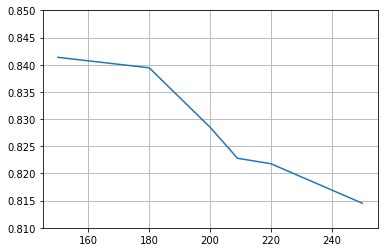

In [70]:
import matplotlib.pyplot as plt #K=209 is a good one with PCA
plt.plot(n_neighbors,accuracy_scores);
plt.ylim((.81,.85))
plt.grid()

In [71]:
statistics.mean(accuracy_scores)

0.8280637254901961

## Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
r = RandomForestClassifier(n_estimators=500,n_jobs=-1,max_leaf_nodes=16)
r.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=16,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [74]:
pred = r.predict(X_test)
r.score(X_test, y_test)

1.0

In [75]:
#Adding 1 column in each step
ind = [1,2,3,4,5,6,7,8]
sco=[]
for i in ind:
    xx = X.iloc[:,:i]
    X_train, X_test, y_train, y_test = train_test_split(xx, y, test_size=0.30, random_state=101)
    r = RandomForestClassifier(n_estimators=500,n_jobs=-1,max_leaf_nodes=16)
    r.fit(X_train,y_train)
    pred = r.predict(X_test)
    sc = r.score(X_test, y_test)
    sco.append(sc)
print(sco)

[0.6270680147058824, 0.6369485294117647, 0.8039981617647058, 0.8375459558823529, 0.8360140931372549, 0.9998468137254902, 1.0, 1.0]


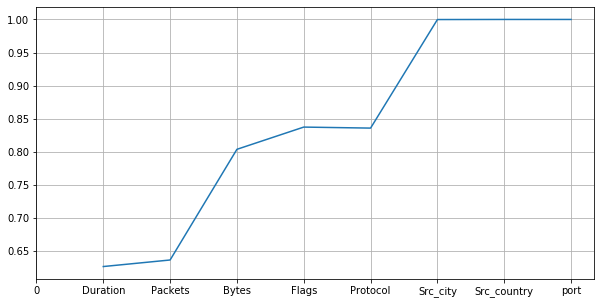

In [76]:
plt.figure(figsize=(10,5))
plt.plot(ind,sco)
plt.xticks(np.arange(9),(0,'Duration','Packets','Bytes','Flags','Protocol','Src_city','Src_country','port'))
plt.grid()

## Feature Importance

In [77]:
r = RandomForestClassifier(n_estimators=500,n_jobs=-1)
r.fit(X,y)
feat = []
n = []
for name,score in zip(X, r.feature_importances_):
    print(name,score)
    feat.append(score)
    n.append(name)


Duration 0.008422513124538462
Packets 0.0033032036144540642
Bytes 0.02646908387288938
Flags 0.037919882107581945
Protocol 0.002706874439153367
Src_city 0.4055933069402839
Src_country 0.47258634099169283
port 0.04299879490940603


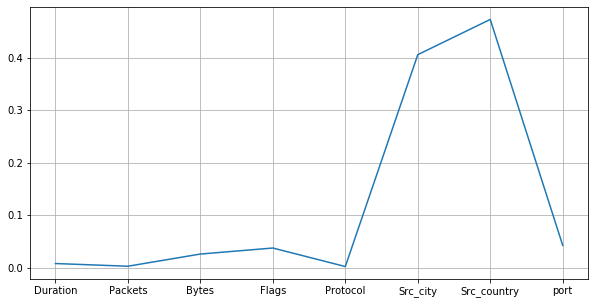

In [78]:
plt.figure(figsize=(10,5))
plt.plot(n,feat)
#plt.ylim((.85,.92))
plt.grid()

<font color='Blue'><font size=4>The location variables appear to skew the models. So we will repeat the same models without location columns.

<font size=6><b>Without src city and country

In [79]:
newX = X[['Duration','Packets','Bytes','Flags','Protocol','port']]
newX.head()

,Duration,Packets,Bytes,Flags,Protocol,port
4117,0.000,1,263,27,9,64
6269,0.000,1,66,8,9,64
8919,2.712,4,256,27,9,64
10127,0.000,1,64,27,9,64
11546,0.000,1,64,27,9,64


In [80]:
r = RandomForestClassifier(n_estimators=500,n_jobs=-1)
r.fit(newX,y)
feat = []
n = []
for name,score in zip(newX, r.feature_importances_):
    print(name,score)
    feat.append(score)
    n.append(name)


Duration 0.10217901321295957
Packets 0.06375059028374436
Bytes 0.43897477641058774
Flags 0.19874740831162466
Protocol 0.022629689341759816
port 0.17371852243932387


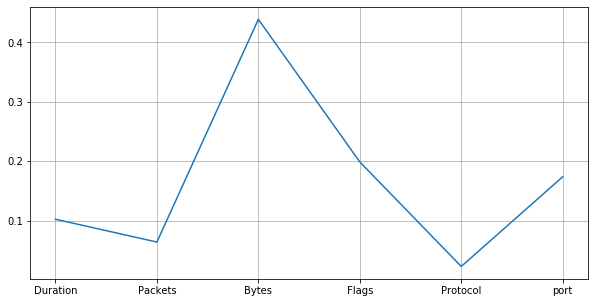

In [81]:
plt.figure(figsize=(10,5))
plt.plot(n,feat)
plt.grid()

### KNN

In [82]:
X_train, X_test, y_train, y_test = train_test_split(newX,y,
                                                    test_size=0.30,random_state =101)

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

In [84]:
#43520 rows, kvalue = sqrt(N) = 208.6

In [85]:
n_neighbors=[150,180,200,209,220,250] 
acc = []
for i in n_neighbors:
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)

    print('WITH K=',i)
    print('\n')
    print(confusion_matrix(y_test,pred))
    print('\n')
    print(classification_report(y_test,pred))
    acc.append(metrics.accuracy_score(y_test, pred))
print(acc)


WITH K= 150


[[5301 1108]
 [ 899 5748]]


              precision    recall  f1-score   support

          no       0.85      0.83      0.84      6409
         yes       0.84      0.86      0.85      6647

    accuracy                           0.85     13056
   macro avg       0.85      0.85      0.85     13056
weighted avg       0.85      0.85      0.85     13056

WITH K= 180


[[5226 1183]
 [ 999 5648]]


              precision    recall  f1-score   support

          no       0.84      0.82      0.83      6409
         yes       0.83      0.85      0.84      6647

    accuracy                           0.83     13056
   macro avg       0.83      0.83      0.83     13056
weighted avg       0.83      0.83      0.83     13056

WITH K= 200


[[5213 1196]
 [1005 5642]]


              precision    recall  f1-score   support

          no       0.84      0.81      0.83      6409
         yes       0.83      0.85      0.84      6647

    accuracy                           0.83     13056

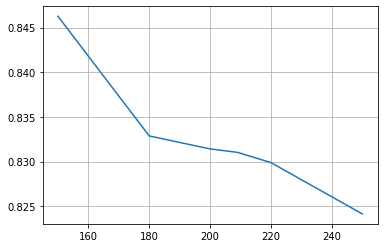

In [86]:
import matplotlib.pyplot as plt  
plt.plot(n_neighbors,acc);
plt.grid()

In [87]:
statistics.mean(acc)

0.8326056985294118

### PCA with KNN

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(newX, y, random_state=1)
from sklearn.decomposition import PCA

pca_model = PCA(n_components=0.95) #95% of variance
pca_model.fit(X_train)
X_train = pca_model.transform(X_train)
X_test = pca_model.transform(X_test)

In [89]:
n_neighbors=[150,180,200,209,220,250] 
accuracy_scores=[]
for i in n_neighbors:
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)

    print('WITH K=',i)
    print('\n')
    print(confusion_matrix(y_test,pred))
    print('\n')
    print(classification_report(y_test,pred))
    accuracy_scores.append(metrics.accuracy_score(y_test, pred))
print(accuracy_scores)


WITH K= 150


[[4532  898]
 [ 921 4529]]


              precision    recall  f1-score   support

          no       0.83      0.83      0.83      5430
         yes       0.83      0.83      0.83      5450

    accuracy                           0.83     10880
   macro avg       0.83      0.83      0.83     10880
weighted avg       0.83      0.83      0.83     10880

WITH K= 180


[[4476  954]
 [ 954 4496]]


              precision    recall  f1-score   support

          no       0.82      0.82      0.82      5430
         yes       0.82      0.82      0.82      5450

    accuracy                           0.82     10880
   macro avg       0.82      0.82      0.82     10880
weighted avg       0.82      0.82      0.82     10880

WITH K= 200


[[4554  876]
 [1071 4379]]


              precision    recall  f1-score   support

          no       0.81      0.84      0.82      5430
         yes       0.83      0.80      0.82      5450

    accuracy                           0.82     10880

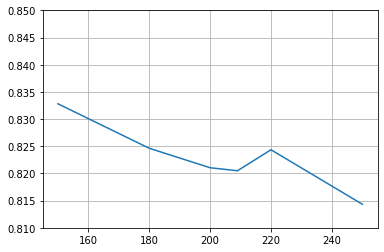

In [90]:
import matplotlib.pyplot as plt 
plt.plot(n_neighbors,accuracy_scores);
plt.ylim((.81,.85))
plt.grid()

In [91]:
statistics.mean(accuracy_scores)

0.8229473039215687

### Random Forest

In [92]:
X_train, X_test, y_train, y_test = train_test_split(newX, y, test_size=0.3, random_state=0)
r = RandomForestClassifier(n_estimators=500,n_jobs=-1,max_leaf_nodes=16)
r.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=16,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [93]:
pred = r.predict(X_test)
r.score(X_test, y_test)

0.8393841911764706

In [94]:
#Adding 1 column in each step
ind = [1,2,3,4,5,6]
sco=[]
for i in ind:
    xx = newX.iloc[:,:i]
    X_train, X_test, y_train, y_test = train_test_split(xx, y, test_size=0.30, random_state=101)
    r = RandomForestClassifier(n_estimators=500,n_jobs=-1,max_leaf_nodes=16)
    r.fit(X_train,y_train)
    pred = r.predict(X_test)
    sc = r.score(X_test, y_test)
    sco.append(sc)
print(sco)

[0.6270680147058824, 0.6369485294117647, 0.7984834558823529, 0.8370863970588235, 0.8389246323529411, 0.8637408088235294]


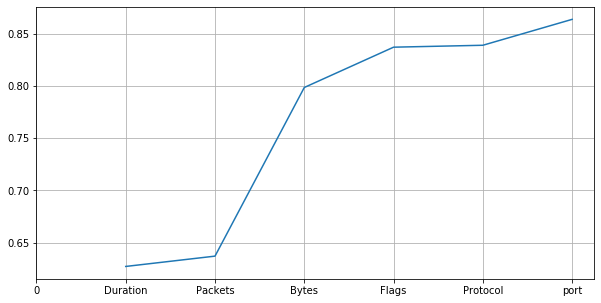

In [95]:
plt.figure(figsize=(10,5))
plt.plot(ind,sco)
plt.xticks(np.arange(7),(0,'Duration','Packets','Bytes','Flags','Protocol','port'))
plt.grid()